In [1]:
#load packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#install dataset package
!pip install --quiet dmba
import dmba
from dmba import classificationSummary

In [7]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
# df = dmba.data.load_data('UniversalBank.csv') #loads to a pandas data frame
# bank_df = df.drop(columns=['ID', 'ZIP Code'])
# X, y = bank_df.drop(columns=['Personal Loan']), bank_df['Personal Loan']

# X[['Education','Securities Account', 'CD Account', 'Online', 'CreditCard']] = X[['Education','Securities Account', 'CD Account', 'Online', 'CreditCard']].astype('category')
# X['Education'] = X.Education.cat.rename_categories({1: 'Undergrad', 2: 'Graduate', 3: 'Professional'})#rename education labels to actual categories
# X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,1,0,0,0
1,45,19,34,3,1.5,Undergrad,0,1,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
X, y = iris['data'], iris['target']

In [13]:
#build KNN model only on numeric columns
#for KNN, standardize the numeric columns
scaler = preprocessing.StandardScaler()
# ncols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
# scaler.fit(X[ncols])
scaler.fit(X)

StandardScaler()

In [15]:
ncols

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

In [16]:
# Transform the numeric columns in the dataset
X_transformed = pd.DataFrame(scaler.transform(X), )

In [17]:
#prepare train and test data - with only the numeric columns
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=12, stratify=y)

In [18]:
#train a classifier for different values of k
results = []
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance').fit(X_train, y_train) #euclidean distance, default; weights by default is uniform, change it to distance
    results.append({'k': k, 'accuracy': metrics.accuracy_score(y_test, knn.predict(X_test))})

In [19]:
results = pd.DataFrame(results)
print(results)
print('\033[1m'+" Best k: ", np.argmax(results.to_numpy(), axis=0)[1] + 1)

   k  accuracy
0  1  0.977778
1  2  0.977778
2  3  0.977778
3  4  0.977778
4  5  1.000000
5  6  0.977778
6  7  1.000000
7  8  1.000000
8  9  1.000000
 Best k:  5


In [20]:
#use numeric and non-numeric columns for KNN (with gower distance for variables with mixed data type)
!pip install --quiet gower
import gower as g

#prepare train and test data
#normalization of numeric column is handled internally by gower distance measure, and hence raw input matrix is used
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y)
trainRows, testRows = X_train.shape[0], X_test.shape[0]

In [ ]:
#append train and test data to compute overall distance matrix
Xall = np.concatenate((X_train, X_test), axis=0)

In [24]:
Xall

array([[6.6, 3. , 4.4, 1.4],
       [6.9, 3.2, 5.7, 2.3],
       [4.4, 2.9, 1.4, 0.2],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.7, 5.1, 1.6],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3. , 1.3, 0.2],
       [6.2, 2.2, 4.5, 1.5],
       [7.2, 3.2, 6. , 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.1, 4.7, 1.5],
       [5.1, 2.5, 3. , 1.1],
       [5.1, 3.4, 1.5, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [7.7, 3.8, 6.7, 2.2],
       [5.6, 3. , 4.1, 1.3],
       [6.7, 3.3, 5.7, 2.5],
       [5.7, 2.5, 5. , 2. ],
       [6.3, 2.5, 5. , 1.9],
       [5.7, 2.8, 4.1, 1.3],
       [5.4, 3.9, 1.3, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [4.9, 2.4, 3.3, 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.9, 3. , 5.1, 1.8],
       [4.9, 3.6, 1.4, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [4.9, 3. , 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6. , 2.2, 5. , 1.5],
       [4.4, 3

In [50]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'age':[21, 22, 40],
                   'gender':['M', 'M', 'F'],
                   'civil_status':['MARRIED', 'SINGLE', 'SINGLE']
                 })

df

,age,gender,civil_status
0,21,M,MARRIED
1,22,M,SINGLE
2,40,F,SINGLE


In [52]:
print(df)

   age gender civil_status
0   21      M      MARRIED
1   22      M       SINGLE
2   40      F       SINGLE


In [51]:
import gower

gower.gower_matrix(df)

array([[0.       , 0.3508772, 1.       ],
       [0.3508772, 0.       , 0.6491228],
       [1.       , 0.6491228, 0.       ]], dtype=float32)

In [25]:
#distance matrix is built for both train and test data together; during training only train rows are used
dMatrix = g.gower_matrix(Xall, cat_features=[False]*4) #columns 1-5 and 7 are numeric and the rest are categorical

In [36]:
dMatrix.shape

(150, 150)

In [33]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [34]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [26]:
#train a classifier for different values of k
results = []
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed', weights='distance').fit(dMatrix[0:trainRows, 0:trainRows], y_train) #train rows x train rows dist matrix
    results.append({'k': k, 'accuracy': metrics.accuracy_score(y_test, knn.predict(dMatrix[trainRows:trainRows+testRows, 0:trainRows]))}) #test rows x train rows dist matrix (test done on the same set of columns used for train)

results = pd.DataFrame(results)
print(results)
print('\033[1m'+"Best k: ", np.argmax(results.to_numpy(), axis=0)[1] + 1)

   k  accuracy
0  1  0.955556
1  2  0.955556
2  3  0.977778
3  4  0.977778
4  5  0.977778
5  6  0.977778
6  7  0.977778
7  8  0.977778
8  9  0.977778
Best k:  3


Accuracy  0.978


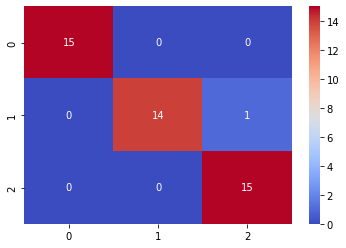

In [27]:
#final model, based on best k identified above
knn = KNeighborsClassifier(n_neighbors=4, metric='precomputed', weights='distance').fit(dMatrix[0:trainRows, 0:trainRows], y_train)
acc = metrics.accuracy_score(y_test, knn.predict(dMatrix[trainRows:trainRows+testRows, 0:trainRows])).round(3)
print("Accuracy ", acc)

import seaborn as sns
%matplotlib inline

cmat = metrics.confusion_matrix(y_test, knn.predict(dMatrix[trainRows:trainRows+testRows, 0:trainRows]))
p=sns.heatmap(cmat, annot=True, fmt='', cmap='coolwarm')

In [28]:
classificationSummary(y_test, knn.predict(dMatrix[trainRows:trainRows+testRows, 0:trainRows]))

Confusion Matrix (Accuracy 0.9778)

       Prediction
Actual  0  1  2
     0 15  0  0
     1  0 14  1
     2  0  0 15


In [30]:
pd.DataFrame(y_test).shape

(45, 1)